In [1]:
from rna2d.pipelines import Pipeline
%load_ext autoreload
%autoreload

In [2]:
p = Pipeline('../../results/canon', "/data/2d-rna/validation-canon-non0/results.rpt")
methods, indeces = p.run_for_all()

In [9]:
with open("../../metadata/representants.txt") as f:
    repres = f.readlines()

repres = [r.strip() for r in repres]
print(len(repres))
repres = [r for r in repres if '-' not in r]
print(len(repres))


1646
1254


In [4]:
import pandas as pd
tool = 'rnafold'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
df = pd.DataFrame(methods[tool], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[tool])
res = df.loc[common_ind]
x = df.loc[df['INF']>0].head(100).tail()
print(
    f"All indeces: {len(indeces[tool])}, Representants: {len(repres)}, Intersection: {len(common_ind)}")
print(f"Before filtering: {df['INF'].mean()}")
print(f"After filtering: {res['INF'].mean()}")
print(x)


All indeces: 7230, Representants: 1254, Intersection: 515
Before filtering: 0.6980669432918455
After filtering: 0.758609708737865
              PPV  TPR     F1    INF
1EXY_1_A    1.000  1.0  1.000  1.000
1F1T_1_A    0.300  0.6  0.400  0.424
1F27_1_A    1.000  1.0  1.000  1.000
1F5G_1_A-B  0.625  1.0  0.769  0.791
1F5H_1_A-B  0.625  1.0  0.769  0.791


### TODO
Analiza długości sekwencji
```
0-50
50-100
100-150
150-200
200+ / 200-300, 300-400, 400-500
```
Analiza reprezntantów w poszczególnych rodzinach: <br>
Rodziny można pobrać w json: [tutaj](https://rfam.org/family/RF00002/structures?content-type=application/json)<br>
Identyfikator PDB+chain





In [5]:
%autoreload
from rna2d.utils import get_names
tool = 'spot-rna'
common_ind = set(indeces[tool])
common_ind = list(common_ind.intersection(repres))
res = {}
for k in get_names():
    df = pd.DataFrame(methods[k], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=indeces[k])
    res[k] =  df.loc[common_ind]

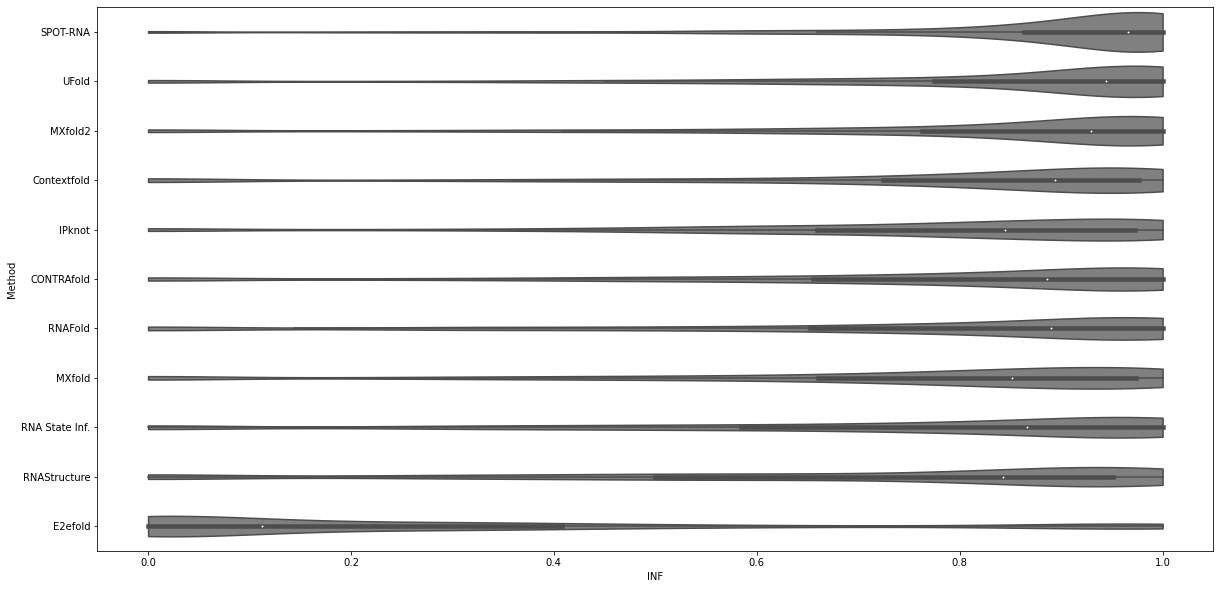

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.utils import get_sns_data, get_means_stds, get_DataFrames


means, stds, dfs = get_means_stds(res, indeces, out_path='../../results/canon')
dfmeans, dfstds = get_DataFrames(means, stds, out_path="../../results/canon", name='wc')

d = get_sns_data(res, dfmeans, get_names())

fig, axs = plt.subplots(1, figsize=(20, 10))
ax = sns.violinplot(x='INF', y='Method', inner='box', color='grey', data=d, ax=axs, cut=0)

In [7]:
dfmeans

,PPV,TPR,F1,INF
spot-rna,0.84,0.91,0.87,0.88
ufold,0.81,0.86,0.83,0.83
mxfold2,0.79,0.85,0.82,0.82
contextFold,0.74,0.83,0.78,0.78
ipknot,0.73,0.81,0.77,0.77
contrafold,0.75,0.80,0.77,0.77
rnafold,0.74,0.78,0.76,0.76
mxfold,0.71,0.80,0.75,0.75
rna-state-inf,0.71,0.77,0.74,0.74
rna-structure,0.66,0.74,0.69,0.69


In [8]:
dfstds

,PPV,TPR,F1,INF
spot-rna,0.23,0.20,0.21,0.21
ufold,0.26,0.26,0.26,0.26
mxfold2,0.26,0.25,0.25,0.25
contextFold,0.28,0.29,0.28,0.28
ipknot,0.26,0.27,0.26,0.26
contrafold,0.29,0.29,0.28,0.28
rnafold,0.30,0.31,0.30,0.30
mxfold,0.29,0.29,0.28,0.28
rna-state-inf,0.30,0.31,0.31,0.31
rna-structure,0.32,0.34,0.32,0.32
